In [25]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 2. Load Dataset
file_path = "/content/zomato.csv"   # Replace with your path if needed
df = pd.read_csv(file_path, encoding="utf-8") # Changed encoding to utf-8

# 3. Basic Exploration
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns)
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# Display first rows
df.head()

Shape of dataset: (56252, 13)

Column names:
 Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      56235 non-null  object
 1   name                         56236 non-null  object
 2   online_order                 56233 non-null  object
 3   book_table                   56194 non-null  object
 4   rate                         48414 non-null  object
 5   votes                        56174 non-null  object
 6   phone                        54956 non-null  object
 7   location                     56126 non-null  object
 8   rest_type                    55914 

address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate votes                             phone  \
0          Yes        Yes  4.1/5   775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5   787                      080 41714161   
2          Yes         No  3.8/5   918                    +91 9663487993   
3           No         No  3.7/5    88                    +91 9620009302   
4           No         No  3.8/5   166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people) listed_in(type)  
0  North Indian, Mughlai, Chinese                         800          Buffet  
1     Chinese, North Indian, Thai                         800          Buffet  
2          Cafe, Mexican, Italian                         800          Buffet  
3      South Indian, North Indian                         300          Buffet  
4        North Indian, Rajasthani                         600          Buffet

In [11]:
# Drop duplicates
df = df.drop_duplicates()

# Drop rows with too many missing values
df = df.dropna(how='any')   # or customize

print("After cleaning:", df.shape)


After cleaning: (14694, 13)


In [7]:
# Clean the 'rate' column
df['rate'] = df['rate'].str.replace('/5', '', regex=False)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Display basic stats and missing values for the cleaned rate column
print("Cleaned 'rate' column info:")
print(df['rate'].info())
print("\nMissing values in 'rate' after cleaning:")
print(df['rate'].isnull().sum())

print("\nFirst 5 rows of 'rate' column after cleaning:")
display(df[['name', 'rate']].head())

Cleaned 'rate' column info:
<class 'pandas.core.series.Series'>
RangeIndex: 56252 entries, 0 to 56251
Series name: rate
Non-Null Count  Dtype  
--------------  -----  
41665 non-null  float64
dtypes: float64(1)
memory usage: 439.6 KB
None

Missing values in 'rate' after cleaning:
14587

First 5 rows of 'rate' column after cleaning:


name  rate
0                  Jalsa   4.1
1         Spice Elephant   4.1
2        San Churro Cafe   3.8
3  Addhuri Udupi Bhojana   3.7
4          Grand Village   3.8

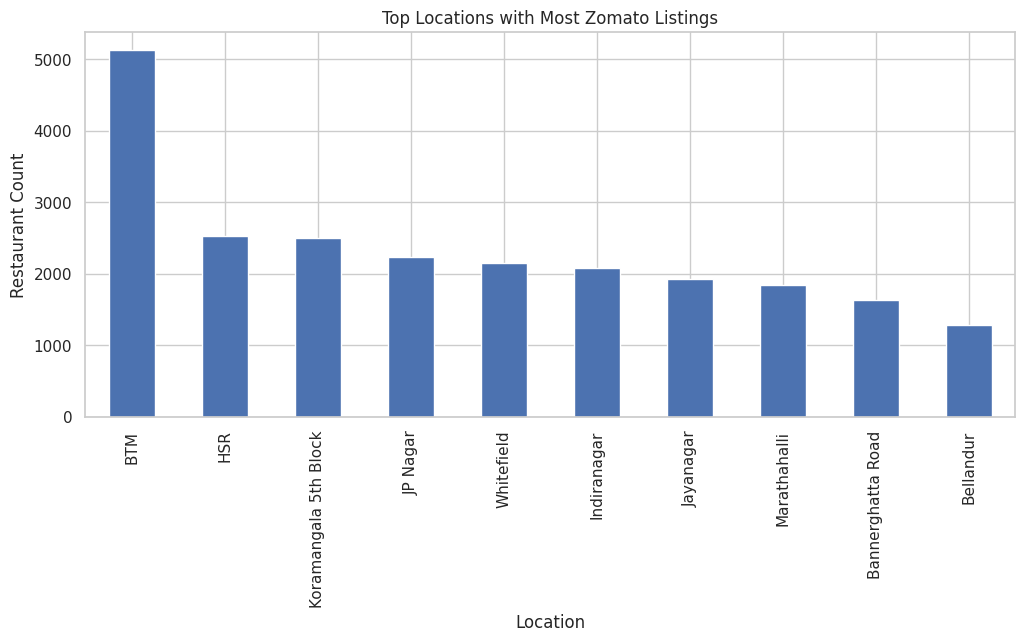

In [4]:
plt.figure(figsize=(12,5))
df['location'].value_counts().head(10).plot(kind='bar')
plt.title("Top Locations with Most Zomato Listings")
plt.xlabel("Location")
plt.ylabel("Restaurant Count")
plt.show()

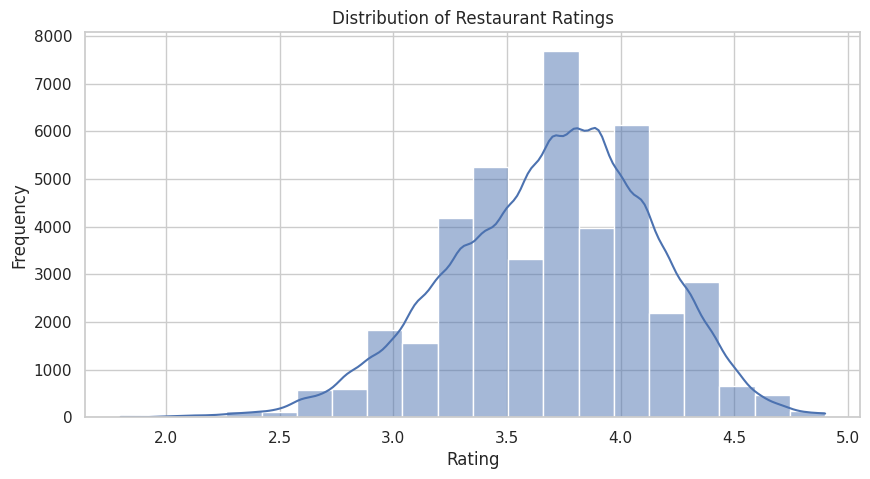

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df['rate'], bins=20, kde=True)
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

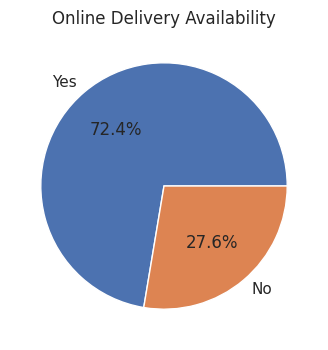

In [12]:
plt.figure(figsize=(6,4))
df['online_order'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Online Delivery Availability")
plt.ylabel("")
plt.show()

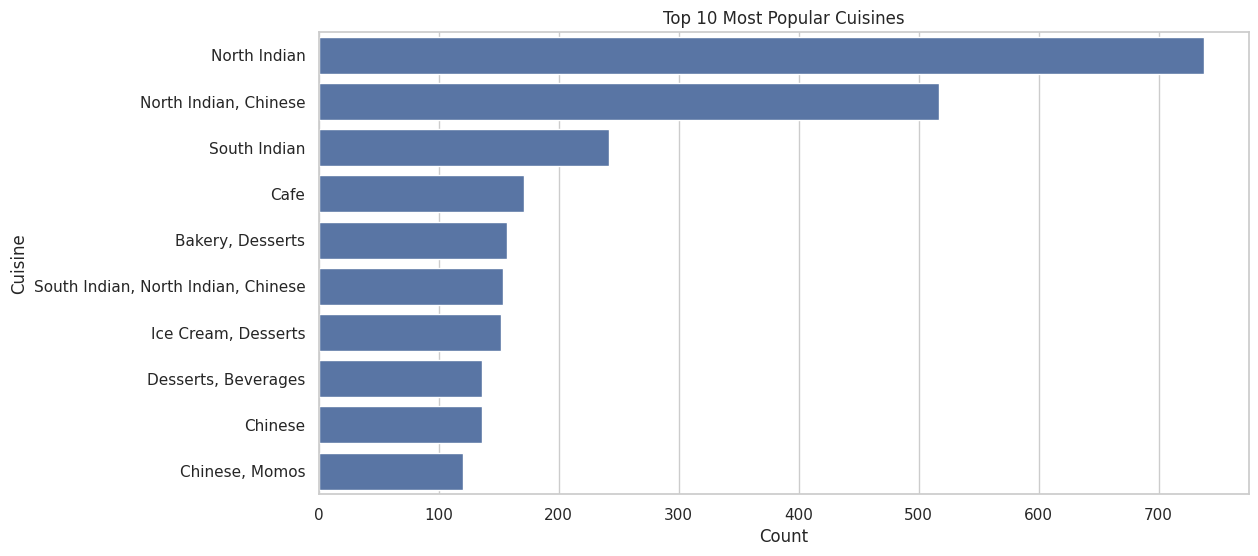

In [14]:
# Split cuisines and count
cuisine_counts = df['cuisines'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index)
plt.title("Top 10 Most Popular Cuisines")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()

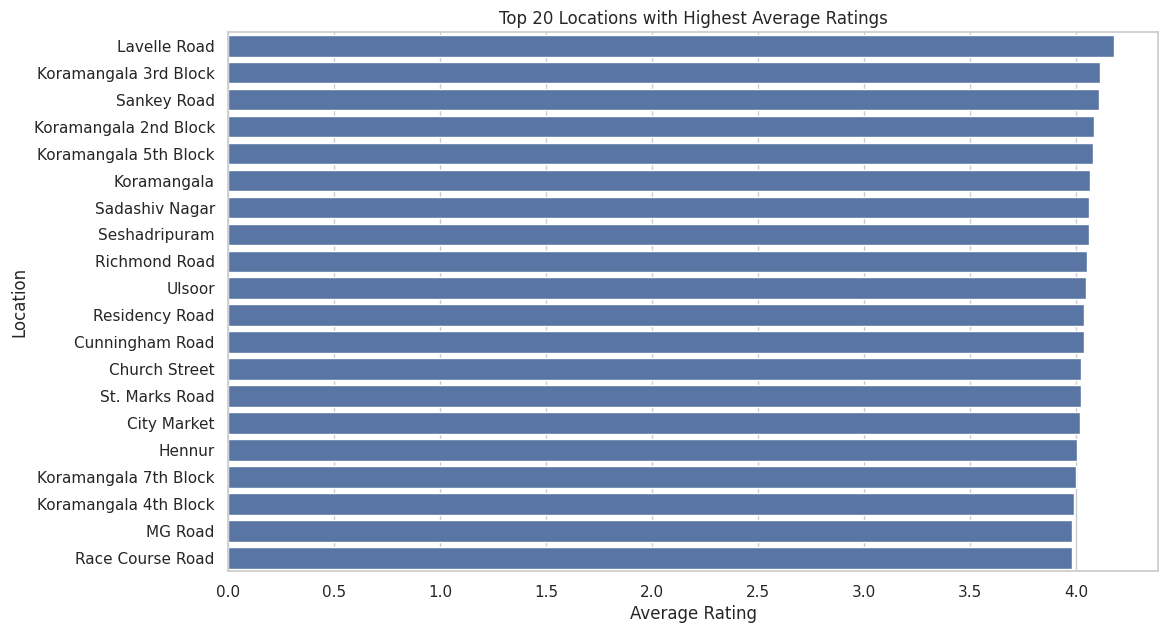

In [16]:
city_rating = df.groupby('location')['rate'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,7))
sns.barplot(x=city_rating.values, y=city_rating.index)
plt.title("Top 20 Locations with Highest Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Location")
plt.show()

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['approx_cost(for two people)'], y=df['rate'])
plt.title("Cost for Two vs Rating")
plt.xlabel("Average Cost for Two")
plt.ylabel("Rating")
plt.show()

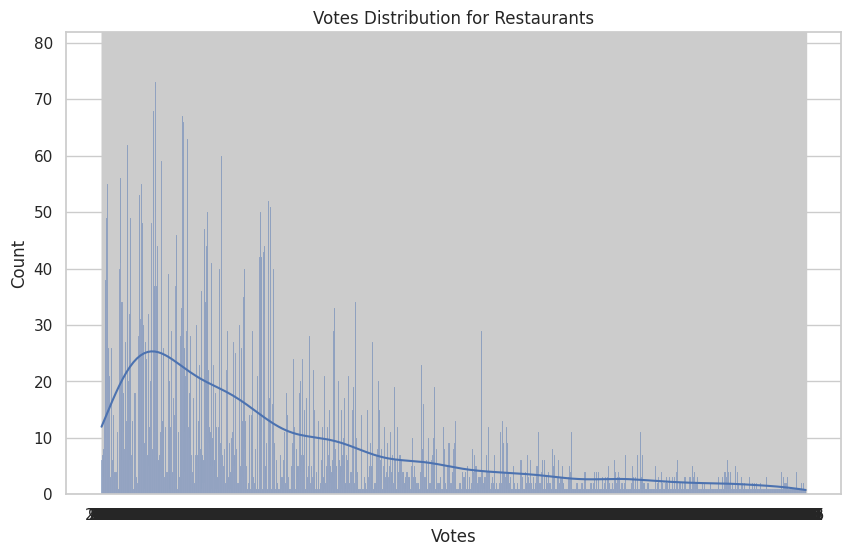

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(df['votes'], bins=40, kde=True)
plt.title("Votes Distribution for Restaurants")
plt.xlabel("Votes")
plt.ylabel("Count")
plt.show()

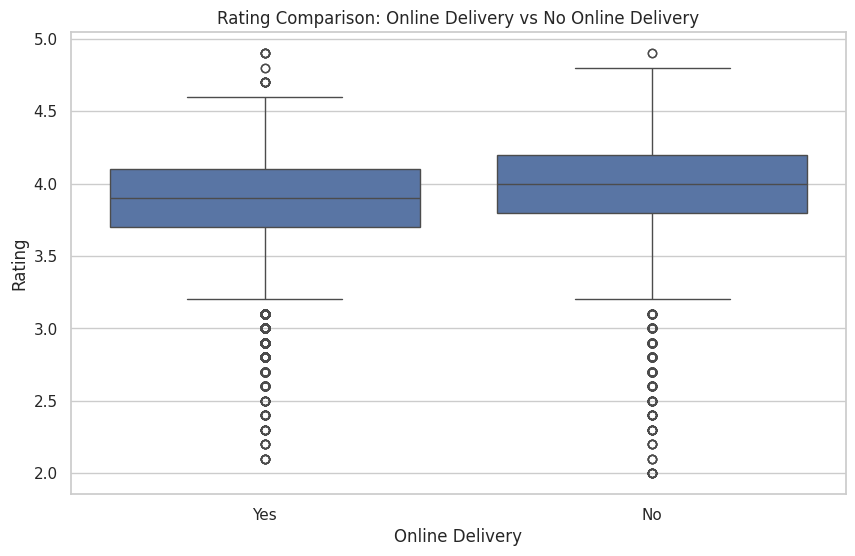

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x="online_order", y="rate", data=df)
plt.title("Rating Comparison: Online Delivery vs No Online Delivery")
plt.xlabel("Online Delivery")
plt.ylabel("Rating")
plt.show()

In [27]:
print("Top 5 Rated Restaurants:")
df[['name', 'rate', 'location']].sort_values(by='rate', ascending=False).head()

Top 5 Rated Restaurants:


name  \
24680   'RATED\n  55 wall Street?\n\nOne of my favori...   
28987   'RATED\n  Beautiful roof top to enjoy a cool ...   
4975    ""RATED\n  Worst ever food. Tasteless over sp...   
56217                                       ('Rated 3.0'   
25554                                       ('Rated 1.0'   

                                                    rate  \
24680  will visit dis place soon. One of the executiv...   
28987  well coooked fish with delicious sauce ! Guara...   
4975   we would like to have it again.\n\nHowever the...   
56217  we informed the same and received a real good ...   
25554  water and pepper there no salt and masala pls ...   

                                                location  
24680   'RATED\n  Just a casual hangout for lunch\n\n...  
28987                      'RATED\n  Had some Great food  
4975                             'RATED\n  Pathetic food  
56217                            Thai Curry was too good  
25554      paneer butter masala had no taste full of oil